In [1]:
import numpy as np
import matplotlib.pyplot as plt

strQx = "CHqx2022.txt"
strQy = "CHqy2022.txt"
strNx = "CHBestand2022.txt"

def ReadDate(strqx,strqy,strbest):
    qxdict = dict() # qx(gender, time, age) returns (qx, nx, dx) # gender 0 man 1 woman
    QxRawData = np.loadtxt(strqx, skiprows=1)
    QyRawData = np.loadtxt(strqy, skiprows=1)
    BestRawData = np.loadtxt(strbest, skiprows=1)
    
    print("Processing Bestand")
    for i in range(len(BestRawData)):
        qxdict[(0,BestRawData[i,0],BestRawData[i,1])] = [None, BestRawData[i,2], None]
        qxdict[(1,BestRawData[i,0],BestRawData[i,1])] = [None, BestRawData[i,3], None]
    
    print("Processing Qx")
    for i in range(len(QxRawData)):
        t = QxRawData[i,0]
        x = QxRawData[i,1]
        qx = QxRawData[i,3]
        Nx = qxdict[(0,t,x)][1] 
        Dx = qx * Nx
        qxdict[(0,t,x)] = [qx, Nx, Dx]
 
    print("Processing Qy")
    for i in range(len(QyRawData)):
        t = QyRawData[i,0]
        x = QyRawData[i,1]
        qx = QyRawData[i,3]
        Nx = qxdict[(1,t,x)][1] 
        Dx = qx * Nx
        qxdict[(1,t,x)] = [qx, Nx, Dx]
    
    return qxdict

QxData = ReadDate(strQx,strQy,strNx)

Processing Bestand
Processing Qx
Processing Qy


test data man
[0.23462, 33781.0, 7925.69822]
[0.00404, 28074.0, 113.41896]
[0.22744, 34807.0, 7916.50408]
[0.00348, 41640.0, 144.9072]
[9e-05, 40350.0, 3.6315000000000004]
[0.05816, 25434.0, 1479.24144]
test data woman
[0.19617, 34056.0, 6680.76552]
[0.00448, 27485.0, 123.13279999999999]
[0.19122, 35195.0, 6729.9879]
[0.00316, 43971.0, 138.94836]
[0.00012, 42417.0, 5.09004]
[0.03496, 16139.0, 564.21944]
test plot


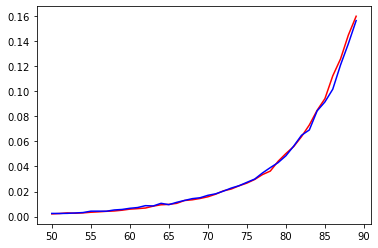

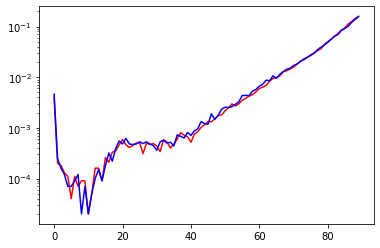

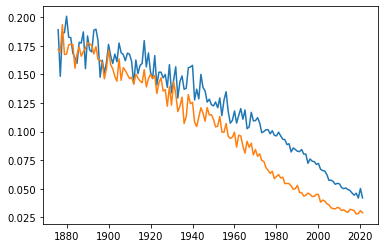

In [29]:
print("test data man")

print(QxData[0,1876,0])
print(QxData[0,1876,10])
print(QxData[0,1877,0])
print(QxData[0,2018,0])
print(QxData[0,2018,10])
print(QxData[0,2002,79])

print("test data woman")

print(QxData[1,1876,0])
print(QxData[1,1876,10])
print(QxData[1,1877,0])
print(QxData[1,2018,0])
print(QxData[1,2018,10])
print(QxData[1,2002,79])

print("test plot")
t = 2020
x=[]
qx=[]
qy=[]
qz=[]
for i in range(50,90):
    x.append(i)
    qx.append(QxData[0,t,i][0])
    qy.append(QxData[0,t-5,i][0])
    #qz.append(QxData[0,t+1,i][0])
plt.figure(1)   
plt.plot(x,qx,'r',x,qy,'b')

x=[]
qx=[]
qy=[]
qz=[]
for i in range(0,90):
    x.append(i)
    qx.append(QxData[0,t,i][0])
    qy.append(QxData[0,t-5,i][0])
    #qz.append(QxData[0,t+1,i][0])
plt.figure(2)   
plt.semilogy(x,qx,'r',x,qy,'b')

x= 80
t=[]
qx=[]
qy=[]

for i in range(1876,2023):
    t.append(i)
    qx.append(QxData[0,i,x][0])
    qy.append(QxData[1,i,x][0])

plt.figure(3)   
plt.plot(t,qx,t,qy)

Optimization terminated successfully.
         Current function value: 0.000027
         Iterations: 157
         Function evaluations: 275
(array([-9.75360269e+00,  5.62496766e-02,  3.43855506e-04]), 2.7325928740935862e-05, 157, 275, 0)


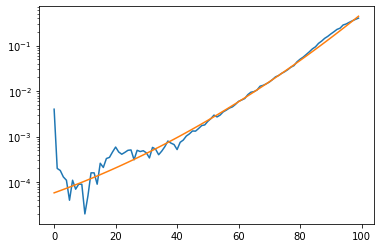

In [23]:
import math
import scipy
import scipy.optimize

def qxModel(age, myp):
    a=myp[0]
    b=myp[1]
    c=myp[2]
    return(math.exp(a+(b+c*age)*age))

t = 2020
x=[]
qx=[]
qy=[]
for i in range(0,110):
    x.append(i)
    qx.append(QxData[0,t,i][0])
    qy.append(QxData[1,t,i][0])
    
def MyErr(a):
    Err = 0
    for i in range(80):
        Err += (qxModel(i,a)-qx[i])**2
    return Err

qxp = [-9.13275,8.09432e-2,  -1.1018e-5]
d = scipy.optimize.fmin(MyErr, qxp, args=(), xtol=0.0001, ftol=0.0001, full_output = True)

print(d)

x=[]
qx1=[]
qx2=[]
for i in range(100):
    x.append(i)
    qx1.append(QxData[0,t,i][0])
    qx2.append(qxModel(i, d[0]))
    
plt.figure(3)
plt.semilogy(x,qx1,x,qx2)

Optimization terminated successfully.
         Current function value: 0.074927
         Iterations: 81
         Function evaluations: 138
(array([ 0.00597463,  0.00851016,  0.03046771, -0.03421151, -0.01836884]), 0.07492733036232205, 81, 138, 0)
Optimization terminated successfully.
         Current function value: 0.093299
         Iterations: 74
         Function evaluations: 130
(array([ 0.00184288,  0.01382574,  0.01939253, -0.12111257,  0.00605885]), 0.09329926830859919, 74, 130, 0)
Optimization terminated successfully.
         Current function value: 0.081446
         Iterations: 85
         Function evaluations: 146
(array([ 0.00228264,  0.01253238,  0.01931005, -0.12268113,  0.00367656]), 0.08144604201528675, 85, 146, 0)
Optimization terminated successfully.
         Current function value: 0.101901
         Iterations: 81
         Function evaluations: 138
(array([ 0.00195129,  0.01264599,  0.02108937, -0.10019055,  0.00190255]), 0.10190050446678436, 81, 138, 0)
Optimization

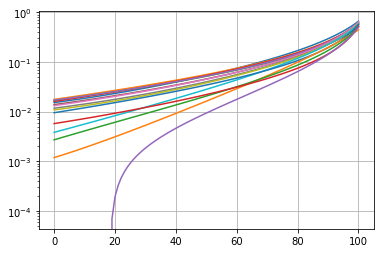

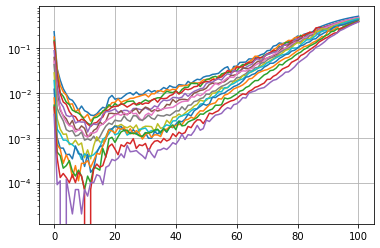

In [24]:
def MyErr(a):
    Err = 0
    for i in range(15,100):
        Err += (qxModelMakeham(i,a)-qx[i])**2
    return Err

def qxModelMakeham(age, myp):
    x = age
    a=myp[0]
    b=myp[1]
    c=myp[2]
    d=myp[3] # if <> 0 Perks
    e=myp[4] # if <> 0 Perks
    return((a+b*math.exp(c*x))/(1+d*math.exp(c*x)+e*math.exp(-c*x)))



def qxModel2(age, myp):
    x = age
    a=myp[0]
    b=myp[1]
    c=myp[2]
    d=myp[3]
    e=myp[4]
    return((a+b*math.exp(c*x))/(1+d*math.exp(c*x)+e*math.exp(-c*x)))

def qxModel3(age, myp):
    a=myp[0]
    b=myp[1]
    return(math.exp(a+(b)*age))



T =range(1876,2018,10)
I =range(0,80)
P =range(0,101)

for t in T:
    #t = 2018
    x=[]
    qx=[]
    qy=[]
    for i in range(0,110):
        x.append(i)
        qx.append(QxData[0,t,i][0])
        qy.append(QxData[1,t,i][0])
    
    qxp = [0.0016,0.045,0.007,0.11,0.004]
    d = scipy.optimize.fmin(MyErr, qxp, args=(), xtol=0.001, ftol=0.001, full_output = True)

    print(d)
    
    x=[]
    qx1=[]
    qx2=[]
    for i in P:
        x.append(i)
        qx1.append(QxData[0,t,i][0])
        qx2.append(qxModelMakeham(i, d[0]))
   
    plt.figure(4)
    plt.semilogy(x,qx2)
    plt.grid(True)
    
    plt.figure(5)
    plt.semilogy(x,qx1)
    plt.grid(True)
 

Optimization terminated successfully.
         Current function value: 0.001394
         Iterations: 50
         Function evaluations: 97
(array([-7.15401859e+00,  6.76403287e-02, -1.77671289e-05]), 0.0013944308598201696, 50, 97, 0)
Optimization terminated successfully.
         Current function value: 0.001733
         Iterations: 59
         Function evaluations: 108
(array([-7.86848263e+00,  7.68131844e-02, -1.17867216e-05]), 0.0017326567220342448, 59, 108, 0)
Optimization terminated successfully.
         Current function value: 0.001553
         Iterations: 66
         Function evaluations: 120
(array([-7.62206966e+00,  7.21070409e-02, -1.27231871e-05]), 0.0015531601765734677, 66, 120, 0)
Optimization terminated successfully.
         Current function value: 0.000557
         Iterations: 60
         Function evaluations: 112
(array([-7.73866802e+00,  7.36734176e-02, -1.07389595e-05]), 0.0005573391854030441, 60, 112, 0)
Optimization terminated successfully.
         Current functio

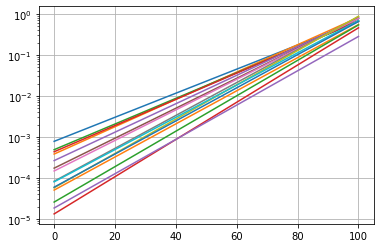

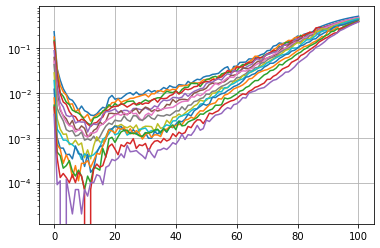

In [25]:
def MyErr(a):
    Err = 0
    for i in range(10,80):
        Err += (qxModel3(i,a)-qx[i])**2
    return Err

def qxModelMakeham(age, myp):
    x = age
    a=myp[0]
    b=myp[1]
    c=myp[2]
    d=myp[3] # if <> 0 Perks
    e=myp[4] # if <> 0 Perks
    return((a+b*math.exp(c*x))/(1+d*math.exp(c*x)+e*math.exp(-c*x)))



def qxModel2(age, myp):
    x = age
    a=myp[0]
    b=myp[1]
    c=myp[2]
    d=myp[3]
    e=myp[4]
    return((a+b*math.exp(c*x))/(1+d*math.exp(c*x)+e*math.exp(-c*x)))

def qxModel3(age, myp):
    a=myp[0]
    b=myp[1]
    return(math.exp(a+(b)*age))



T =range(1876,2018,10)
I =range(0,80)
P =range(0,101)

for t in T:
    #t = 2018
    x=[]
    qx=[]
    qy=[]
    for i in range(0,110):
        x.append(i)
        qx.append(QxData[0,t,i][0])
        qy.append(QxData[1,t,i][0])
    
    qxp = [-9.13275,8.09432e-2,  -1.1018e-5]
    d = scipy.optimize.fmin(MyErr, qxp, args=(), xtol=0.001, ftol=0.001, full_output = True)

    print(d)
    
    x=[]
    qx1=[]
    qx2=[]
    for i in P:
        x.append(i)
        qx1.append(QxData[0,t,i][0])
        qx2.append(qxModel3(i, d[0]))
   
    plt.figure(6)
    plt.semilogy(x,qx2)
    plt.grid(True)
    
    plt.figure(7)
    plt.semilogy(x,qx1)
    plt.grid(True)